https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from pylab import rcParams

In [2]:
df =pd.read_csv('datasets/heart_cdc.csv')

In [3]:
df.head(20)

,_state,fmonth,idate,imonth,iday,iyear,dispcode,seqno,_psu,ctelenm1,...,_rfpsa23,_clnscpy,_sgmscpy,_sgms10y,_rfblds4,_stoldna,_vircoln,_sbontim,_crcrec1,_aidtst4
0,1,1,1042020,1,4,2020,1100,2020000001,2020000001,1.0,...,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0
1,1,1,2072020,2,7,2020,1200,2020000002,2020000002,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2,1,1,1232020,1,23,2020,1100,2020000003,2020000003,1.0,...,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0
3,1,1,1092020,1,9,2020,1100,2020000004,2020000004,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,1,1,1042020,1,4,2020,1100,2020000005,2020000005,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
5,1,1,1092020,1,9,2020,1100,2020000006,2020000006,1.0,...,2.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0
6,1,1,1092020,1,9,2020,1200,2020000007,2020000007,1.0,...,NaN,1.0,NaN,NaN,2.0,1.0,3.0,2.0,1.0,2.0
7,1,1,1292020,1,29,2020,1200,2020000008,2020000008,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
8,1,1,1302020,1,30,2020,1100,2020000009,2020000009,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
9,1,1,1042020,1,4,2020,1100,2020000010,2020000010,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [4]:
columns_name_mapping = {
    "cvdcrhd4": "HeartDisease",
    "weight2": "BMI1", 
    "height3":"BMI2", 
    "_smoker3":"Smoking", 
    "drnkany5":"AlcoholDrinking", 
    "cvdstrk3":"Stroke", 
    "physhlth":"PhysicalHealth",
    "menthlth":"MentalHealth", 
    "diffwalk":"DiffWalking", 
    "_sex":"Sex", 
    "_ageg5yr":"AgeCategory", 
    "_race":"Race", 
    "diabete4":"Diabetic", 
    "exerany2":"PhysicalActivity", 
    "genhlth":"GenHealth", 
    "sleptim1":"SleepTime", 
    "_asthms1":"Asthma", 
    "chckdny2":"KidneyDisease", 
    "chcscncr":"SkinCancer",
    "_bmi5":"BMI_calc"
}

df.rename(columns=columns_name_mapping, inplace=True)

In [5]:
# Define a list of the columns you want to keep
columns_to_keep = [ 
    "HeartDisease",
    "BMI1", 
    "BMI2", 
    "Smoking", 
    "AlcoholDrinking", 
    "Stroke", 
    "PhysicalHealth",
    "MentalHealth", 
    "DiffWalking", 
    "Sex", 
    "AgeCategory", 
    "Race", 
    "Diabetic", 
    "PhysicalActivity", 
    "GenHealth", 
    "SleepTime", 
    "Asthma", 
    "KidneyDisease", 
    "SkinCancer",
    "BMI_calc"
    ]

# Use the drop() method to remove the columns not in the list
df = df[columns_to_keep]

In [6]:
value_mapping = {
    'HeartDisease': {1:'Yes', 2:'No', 7:'Not Clear', 9:'Refused'},
    'AlcoholDrinking': {1:'Yes', 2:'No', 7:'Not Clear', 9:'Refused'},
    'Stroke': {1:'Yes', 2:'No', 7:'Not Clear', 9:'Refused'},
    'PhysicalActivity': {1:'Yes', 2:'No', 7:'Not Clear', 9:'Refused'},
    'DiffWalking': {1:'Yes', 2:'No', 7:'Not Clear', 9:'Refused'},
    'SkinCancer': {1:'Yes', 2:'No', 7:'Not Clear', 9:'Refused'},
    'KidneyDisease': {1:'Yes', 2:'No', 7:'Not Clear', 9:'Refused'},
    'Asthma': {1:'Current', 2:'Former', 3:'Never', 9:'Not Clear'},
    'Smoking': {1:'Smoker', 2:'Approximate Smoker', 3:'Former Smoker', 4:'Never', 9:'Not Clear'},
    'Sex': {1:'Male', 2:'Female'},
    'AgeCategory': {1:'18-24', 2:'25-29', 3:'30-34', 4:'35-39', 5:'40-44', 6:'45-49', 7:'50-54', 8:'55-59', 9:'60-64', 10:'65-69', 11:'70-74', 12:'75-79', 13:'80+', 14:'Not Clear'},
    'Race': {1:'White', 2:'Black', 3:'Native', 4:'Asian', 5:'Hawaian', 6:'Other', 7:'Multiracial', 8:'Hispanic', 9:'Not Clear'},
    'Diabetic': {1:'Yes', 2:'Yes(Pregnant)', 3:'No', 4:'Border Line', 7:'Not Clear', 9:'Refused'},
    'GenHealth': {1:'Excellent', 2:'Very Good', 3:'Good', 4:'Fair', 5:'Poor', 7:'Not Clear', 9:'Refused'},
}

# Use the replace() method to change the values in the DataFrame
df.replace(value_mapping, inplace=True)

In [7]:
df.head(20)

,HeartDisease,BMI1,BMI2,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_calc
0,No,106.0,507.0,Smoker,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very Good,5.0,Current,No,Yes,1660.0
1,No,170.0,504.0,Not Clear,Refused,No,88.0,88.0,No,Female,65-69,Black,No,Yes,Good,7.0,Former,No,No,2918.0
2,No,7777.0,508.0,Never,No,No,88.0,88.0,No,Female,65-69,Black,No,Yes,Good,7.0,Never,No,No,NaN
3,No,9999.0,9999.0,Never,No,No,88.0,88.0,No,Female,80+,White,No,No,Excellent,6.0,Never,No,No,NaN
4,No,126.0,506.0,Never,No,Yes,88.0,88.0,No,Female,80+,White,No,Yes,Very Good,7.0,Never,No,No,2034.0
5,No,180.0,509.0,Former Smoker,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Current,No,No,2658.0
6,No,150.0,506.0,Never,No,No,88.0,88.0,No,Female,75-79,White,No,No,Good,6.0,Never,No,Yes,2421.0
7,No,150.0,503.0,Smoker,Refused,No,15.0,10.0,No,Female,65-69,Black,Yes,Yes,Fair,6.0,Never,No,No,2657.0
8,No,170.0,511.0,Never,No,No,28.0,88.0,Yes,Female,40-44,White,No,Yes,Very Good,8.0,Never,No,No,2371.0
9,Yes,163.0,503.0,Former Smoker,No,No,6.0,88.0,Yes,Female,75-79,Black,No,No,Fair,12.0,Never,No,No,2887.0


In [8]:
print(df.isna().sum())

HeartDisease            3
BMI1                 9852
BMI2                10824
Smoking                 0
AlcoholDrinking         0
Stroke                  3
PhysicalHealth          5
MentalHealth            5
DiffWalking         15280
Sex                     0
AgeCategory             0
Race                    1
Diabetic                6
PhysicalActivity        3
GenHealth               8
SleepTime               3
Asthma                  0
KidneyDisease           6
SkinCancer              3
BMI_calc            41357
dtype: int64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401958 entries, 0 to 401957
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      401955 non-null  object 
 1   BMI1              392106 non-null  float64
 2   BMI2              391134 non-null  float64
 3   Smoking           401958 non-null  object 
 4   AlcoholDrinking   401958 non-null  object 
 5   Stroke            401955 non-null  object 
 6   PhysicalHealth    401953 non-null  float64
 7   MentalHealth      401953 non-null  float64
 8   DiffWalking       386678 non-null  object 
 9   Sex               401958 non-null  object 
 10  AgeCategory       401958 non-null  object 
 11  Race              401957 non-null  object 
 12  Diabetic          401952 non-null  object 
 13  PhysicalActivity  401955 non-null  object 
 14  GenHealth         401950 non-null  object 
 15  SleepTime         401955 non-null  float64
 16  Asthma            40

In [10]:
value_mapping = {
    'HeartDisease': {'Yes':1, 'No':2, 'Not Clear':3, 'Refused':4}, #{1:'Yes', 2:'No', 3:'Not Clear', 4:'Refused'}
    'AlcoholDrinking': {'Yes':1, 'No':2, 'Not Clear':3, 'Refused':4}, #{1:'Yes', 2:'No', 3:'Not Clear', 4:'Refused'}
    'Stroke': {'Yes':1, 'No':2, 'Not Clear':3, 'Refused':4}, #{1:'Yes', 2:'No', 3:'Not Clear', 4:'Refused'}
    'PhysicalActivity': {'Yes':1, 'No':2, 'Not Clear':3, 'Refused':4}, #{1:'Yes', 2:'No', 3:'Not Clear', 4:'Refused'}
    'DiffWalking': {'Yes':1, 'No':2, 'Not Clear':3, 'Refused':4}, #{1:'Yes', 2:'No', 3:'Not Clear', 4:'Refused'}
    'SkinCancer': {'Yes':1, 'No':2, 'Not Clear':3, 'Refused':4}, #{1:'Yes', 2:'No', 3:'Not Clear', 4:'Refused'}
    'KidneyDisease': {'Yes':1, 'No':2, 'Not Clear':3, 'Refused':4}, #{1:'Yes', 2:'No', 3:'Not Clear', 4:'Refused'}
    'Asthma': {'Current':1, 'Former':2, 'Never':3, 'Not Clear':4}, #{1:'Current', 2:'Former', 3:'Never', 4:'Not Clear'}
    'Smoking': {'Smoker':1, 'Approximate Smoker':2, 'Former Smoker':3, 'Never':4, 'Not Clear':5}, #{1:'Smoker', 2:'Approximate Smoker', 3:'Former Smoker', 4:'Never', 5:'Not Clear'}
    'Sex': {'Male':1, 'Female':2}, #{1:'Male', 2:'Female'}
    'AgeCategory': {'18-24':1, '25-29':2, '30-34':3, '35-39':4, '40-44':5, '45-49':6, '50-54':7, '55-59':8, '60-64':9, '65-69':10, '70-74':11, '75-79':12, '80+':13, 'Not Clear':14},
    # {1:'18-24', 2:'25-29', 3:'30=34', 4:'35-39', 5:'40-44', 6:'45-49', 7:'50-54', 8:'55-59', 9:'60-64', 10:'65-69', 11:'70-74', 12:'75-79', 13:'80+', 14:'Not Clear'}
    'Race': {'White':1, 'Black':2, 'Native':3, 'Asian':4, 'Hawaian':5, 'Other':6, 'Multiracial':7, 'Hispanic':8, 'Not Clear':9},
    # {1:'White', 2:'Black', 3:'Native', 4:'Asian', 5:'Hawaian', 6:'Other', 7:'Multiracial', 8:'Hispanic', 9:'Not Clear'}
    'Diabetic': {'Yes':1, 'Yes(Pregnant)':2, 'No':3, 'Border Line':4, 'Not Clear':5, 'Refused':6},
    # {1:'Yes', 2:'Yes(Pregnant)', 3:'No', 4:'Border Line', 5:'Not Clear', 6:'Refused'}
    'GenHealth': {'Excellent':1, 'Very Good':2, 'Good':3, 'Fair':4, 'Poor':5, 'Not Clear':6, 'Refused':7},
    # {1:'Excellent', 2:'Very Good', 3:'Good', 4:'Fair', 5:'Poor', 6:'Not Clear', 7:'Refused'}
}

In [11]:
# Use the replace() method to change the values in the DataFrame
df.replace(value_mapping, inplace=True)

In [12]:
df.head(20)

,HeartDisease,BMI1,BMI2,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_calc
0,2.0,106.0,507.0,1,2,2.0,3.0,30.0,2.0,2,8,1.0,1.0,1.0,2.0,5.0,1,2.0,1.0,1660.0
1,2.0,170.0,504.0,5,4,2.0,88.0,88.0,2.0,2,10,2.0,3.0,1.0,3.0,7.0,2,2.0,2.0,2918.0
2,2.0,7777.0,508.0,4,2,2.0,88.0,88.0,2.0,2,10,2.0,3.0,1.0,3.0,7.0,3,2.0,2.0,NaN
3,2.0,9999.0,9999.0,4,2,2.0,88.0,88.0,2.0,2,13,1.0,3.0,2.0,1.0,6.0,3,2.0,2.0,NaN
4,2.0,126.0,506.0,4,2,1.0,88.0,88.0,2.0,2,13,1.0,3.0,1.0,2.0,7.0,3,2.0,2.0,2034.0
5,2.0,180.0,509.0,3,2,2.0,20.0,30.0,2.0,1,10,1.0,1.0,1.0,4.0,8.0,1,2.0,2.0,2658.0
6,2.0,150.0,506.0,4,2,2.0,88.0,88.0,2.0,2,12,1.0,3.0,2.0,3.0,6.0,3,2.0,1.0,2421.0
7,2.0,150.0,503.0,1,4,2.0,15.0,10.0,2.0,2,10,2.0,1.0,1.0,4.0,6.0,3,2.0,2.0,2657.0
8,2.0,170.0,511.0,4,2,2.0,28.0,88.0,1.0,2,5,1.0,3.0,1.0,2.0,8.0,3,2.0,2.0,2371.0
9,1.0,163.0,503.0,3,2,2.0,6.0,88.0,1.0,2,12,2.0,3.0,2.0,4.0,12.0,3,2.0,2.0,2887.0


In [13]:
df.dtypes

HeartDisease        float64
BMI1                float64
BMI2                float64
Smoking               int64
AlcoholDrinking       int64
Stroke              float64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking         float64
Sex                   int64
AgeCategory           int64
Race                float64
Diabetic            float64
PhysicalActivity    float64
GenHealth           float64
SleepTime           float64
Asthma                int64
KidneyDisease       float64
SkinCancer          float64
BMI_calc            float64
dtype: object

In [14]:
# Specify the number of neighbors (k) to consider
k = 5 

# Create a KNNImputer object with categorical handling strategy
imputer = KNNImputer(n_neighbors=k, weights="uniform", metric="nan_euclidean")
df_imputed = imputer.fit_transform(df)

In [15]:
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

In [52]:
df_imputed.head(20)

,HeartDisease,BMI1,BMI2,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_calc
0,2.0,106.0,507.0,1.0,2.0,2.0,3.0,30.0,2.0,2.0,8.0,1.0,1.0,1.0,2.0,5.0,1.0,2.0,1.0,1660.0
1,2.0,170.0,504.0,5.0,4.0,2.0,88.0,88.0,2.0,2.0,10.0,2.0,3.0,1.0,3.0,7.0,2.0,2.0,2.0,2918.0
2,2.0,7777.0,508.0,4.0,2.0,2.0,88.0,88.0,2.0,2.0,10.0,2.0,3.0,1.0,3.0,7.0,3.0,2.0,2.0,1604.8
3,2.0,9999.0,9999.0,4.0,2.0,2.0,88.0,88.0,2.0,2.0,13.0,1.0,3.0,2.0,1.0,6.0,3.0,2.0,2.0,5805.6
4,2.0,126.0,506.0,4.0,2.0,1.0,88.0,88.0,2.0,2.0,13.0,1.0,3.0,1.0,2.0,7.0,3.0,2.0,2.0,2034.0
5,2.0,180.0,509.0,3.0,2.0,2.0,20.0,30.0,2.0,1.0,10.0,1.0,1.0,1.0,4.0,8.0,1.0,2.0,2.0,2658.0
6,2.0,150.0,506.0,4.0,2.0,2.0,88.0,88.0,2.0,2.0,12.0,1.0,3.0,2.0,3.0,6.0,3.0,2.0,1.0,2421.0
7,2.0,150.0,503.0,1.0,4.0,2.0,15.0,10.0,2.0,2.0,10.0,2.0,1.0,1.0,4.0,6.0,3.0,2.0,2.0,2657.0
8,2.0,170.0,511.0,4.0,2.0,2.0,28.0,88.0,1.0,2.0,5.0,1.0,3.0,1.0,2.0,8.0,3.0,2.0,2.0,2371.0
9,1.0,163.0,503.0,3.0,2.0,2.0,6.0,88.0,1.0,2.0,12.0,2.0,3.0,2.0,4.0,12.0,3.0,2.0,2.0,2887.0


In [17]:
print(df_imputed.isna().sum().to_frame())

                  0
HeartDisease      0
BMI1              0
BMI2              0
Smoking           0
AlcoholDrinking   0
Stroke            0
PhysicalHealth    0
MentalHealth      0
DiffWalking       0
Sex               0
AgeCategory       0
Race              0
Diabetic          0
PhysicalActivity  0
GenHealth         0
SleepTime         0
Asthma            0
KidneyDisease     0
SkinCancer        0
BMI_calc          0


In [23]:
df_imputed.to_csv('heart_imputed.csv', index=False)

In [24]:
df_imputed.shape

(401958, 20)

In [21]:
scaler = StandardScaler()

In [22]:
clus_df_imputed = scaler.fit_transform(df_imputed)

In [23]:
db = DBSCAN(eps=0.15, min_samples=10).fit(clus_df_imputed)

In [33]:
labels = db.labels_

In [40]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 1191
Estimated number of noise points: 321410


In [47]:
kmeans_clus_df_imputed = scaler.fit_transform(df_imputed)

In [49]:
clusterNum = 4
k_means = KMeans(init='k-means++', n_clusters= clusterNum, n_init=12)

In [50]:
k_means.fit(df_imputed)

KMeans(n_clusters=4, n_init=12)

In [55]:
df_imputed["Clus_km"] = k_means.labels_
df_imputed.head(20)

,HeartDisease,BMI1,BMI2,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,...,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_calc,Clus_km
0,2.0,106.0,507.0,1.0,2.0,2.0,3.0,30.0,2.0,2.0,...,1.0,1.0,1.0,2.0,5.0,1.0,2.0,1.0,1660.0,0
1,2.0,170.0,504.0,5.0,4.0,2.0,88.0,88.0,2.0,2.0,...,2.0,3.0,1.0,3.0,7.0,2.0,2.0,2.0,2918.0,0
2,2.0,7777.0,508.0,4.0,2.0,2.0,88.0,88.0,2.0,2.0,...,2.0,3.0,1.0,3.0,7.0,3.0,2.0,2.0,1604.8,2
3,2.0,9999.0,9999.0,4.0,2.0,2.0,88.0,88.0,2.0,2.0,...,1.0,3.0,2.0,1.0,6.0,3.0,2.0,2.0,5805.6,1
4,2.0,126.0,506.0,4.0,2.0,1.0,88.0,88.0,2.0,2.0,...,1.0,3.0,1.0,2.0,7.0,3.0,2.0,2.0,2034.0,0
5,2.0,180.0,509.0,3.0,2.0,2.0,20.0,30.0,2.0,1.0,...,1.0,1.0,1.0,4.0,8.0,1.0,2.0,2.0,2658.0,0
6,2.0,150.0,506.0,4.0,2.0,2.0,88.0,88.0,2.0,2.0,...,1.0,3.0,2.0,3.0,6.0,3.0,2.0,1.0,2421.0,0
7,2.0,150.0,503.0,1.0,4.0,2.0,15.0,10.0,2.0,2.0,...,2.0,1.0,1.0,4.0,6.0,3.0,2.0,2.0,2657.0,0
8,2.0,170.0,511.0,4.0,2.0,2.0,28.0,88.0,1.0,2.0,...,1.0,3.0,1.0,2.0,8.0,3.0,2.0,2.0,2371.0,0
9,1.0,163.0,503.0,3.0,2.0,2.0,6.0,88.0,1.0,2.0,...,2.0,3.0,2.0,4.0,12.0,3.0,2.0,2.0,2887.0,0


In [56]:
df_imputed.groupby('Clus_km').mean()

,HeartDisease,BMI1,BMI2,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_calc
Clus_km,,,,,,,,,,,,,,,,,,,,
0,1.950280,217.833384,541.908884,3.414383,1.618167,1.962874,65.877931,61.050849,1.857969,1.525139,7.628919,2.103601,2.757166,1.235830,2.444349,7.818802,2.780990,1.966117,1.910367,2829.905492
1,2.012672,9471.441315,9408.572218,3.898745,2.225583,2.015900,72.568990,69.028380,2.004160,1.655708,8.738434,3.529588,2.878279,1.269671,2.386730,10.065655,2.846742,2.011500,1.973819,5395.472038
2,1.969973,9158.358194,635.908297,3.628299,1.884634,1.972502,67.431807,63.747195,1.839709,1.822578,8.265817,2.172312,2.727419,1.293947,2.517589,9.011063,2.744087,1.967919,1.929569,5170.257367
3,1.975481,261.545492,8501.755036,3.681818,1.944172,1.981894,69.910600,69.368163,1.867446,1.563750,6.512637,5.522444,2.786496,1.387967,2.688608,9.587514,2.881366,1.971709,1.965673,4680.186043


<Axes: xlabel='Clus_km', ylabel='HeartDisease'>

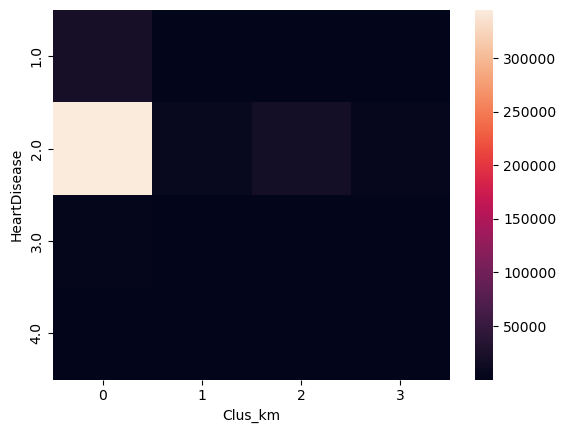

In [75]:
cross = pd.crosstab(df_imputed['HeartDisease'], df_imputed['Clus_km'])
sns.heatmap(cross)